# Libraries

In [ ]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

from IPython.display import Image, display

import os
from langchain.chat_models import init_chat_model

import sys
from pathlib import Path

# Get the current working directory (where you're running the notebook)
current_dir = Path.cwd()
# Go up one level to get to the parent directory where config.py is
parent_dir = current_dir.parent
sys.path.insert(0, str(parent_dir))

{'api_key': '3B7qOUWV69M8zdiTf6yIPXkgWFpcnv3BFYCK5ZAdkY3Zp9mbDXMdJQQJ99BGACYeBjFXJ3w3AAABACOG3Ci8',
 'endpoint': 'https://wh-autogen.openai.azure.com/',
 'deployment_name': 'gpt4-nano',
 'api_version': '2024-12-01-preview'}

# Class

In [12]:

class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

# Main

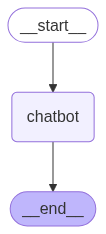

In [ ]:
graph_builder = StateGraph(State)



llm = init_chat_model(
    "azure_openai:gpt-4.1",
    azure_deployment=os.environ["AZURE_OPENAI_DEPLOYMENT_NAME"],
)

def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What is the weather in Singapore"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

Assistant: Hello! How can I assist you today?
Assistant: Hello! It looks like your message didn't include any text. How can I assist you today?
Assistant: Hello! It looks like your message didn't include any text. How can I assist you today?
Assistant: I'm unable to provide real-time weather updates. For the current weather in Singapore, I recommend checking a reliable weather service such as the Weather Channel, AccuWeather, or a weather app on your device.
Assistant: LangChain and LangGraph are both frameworks related to language models and data processing, but they serve different purposes and have different functionalities. Here's a comparison to clarify their differences:

**1. Purpose and Core Functionality**

- **LangChain:**
  - Focuses on building end-to-end language model applications.
  - Provides tools for chaining multiple language model prompts, integrating with external data sources, memory, agents, and more.
  - Supports designing conversational agents, question-answeri